In [2]:
import pandas as pd
import seaborn
import os 
from bot_spotter.constants import DATA_FILE, DATA_FOLDER, LABEL, EVENT, CATEGORY, USER_ID

raw_data = pd.read_csv(os.path.join("../", DATA_FOLDER, DATA_FILE))

In [3]:
raw_data

,UserId,Event,Category,Fake
0,53F7429AB5,phone_call,Jobs,0
1,C08F2A0901,click_ad,Phone,0
2,B124F43F6D,send_sms,Holidays,0
3,6DB134D2D1,send_email,Motor,0
4,8BD16971C5,click_carrousel,Leisure,0
...,...,...,...,...
102360,A7B154945B,click_ad,Phone,0
102361,F6529A3060,send_sms,Motor,0
102362,EB7EBB9CE2,phone_call,Holidays,0
102363,DEF516F906,send_email,Phone,1


## Checks

In [16]:
raw_data[USER_ID].nunique()

5350

In [18]:
raw_data.groupby(USER_ID)[LABEL].nunique().max()

1

In [4]:
raw_data.isnull().sum()

UserId      0
Event       0
Category    0
Fake        0
dtype: int64

## Distributions

In [5]:
raw_data[LABEL].value_counts(normalize=True)

0    0.898803
1    0.101197
Name: Fake, dtype: float64

In [6]:
raw_data[EVENT].value_counts(normalize=True)

send_email         0.231173
click_ad           0.224422
click_carrousel    0.183256
phone_call         0.180951
send_sms           0.180198
Name: Event, dtype: float64

In [7]:
raw_data[CATEGORY].value_counts(normalize=True)

Motor         0.168690
Holidays      0.168261
Leisure       0.167596
Phone         0.166424
Real_State    0.165271
Jobs          0.163757
Name: Category, dtype: float64

In [8]:
raw_data[raw_data[LABEL] == 1][EVENT].value_counts(normalize=True)

send_email         0.444058
click_ad           0.406699
click_carrousel    0.052129
send_sms           0.049715
phone_call         0.047398
Name: Event, dtype: float64

#### Mean target encoding could do the trick.

## Plot nb events and fake/not fake label

In [9]:
nb_events_per_user = raw_data.groupby(USER_ID)[EVENT].size()

In [10]:
nb_events_per_user.describe()

count    5350.000000
mean       19.133645
std         5.109302
min        15.000000
25%        16.000000
50%        18.000000
75%        20.000000
max        49.000000
Name: Event, dtype: float64

In [49]:
sample_nb_events_per_user = nb_events_per_user.sample(1500, random_state=50).reset_index().merge(raw_data[[USER_ID, LABEL]].drop_duplicates(subset=[USER_ID]))

In [50]:
sample_nb_events_per_user[LABEL].value_counts(normalize=True)

0    0.938667
1    0.061333
Name: Fake, dtype: float64

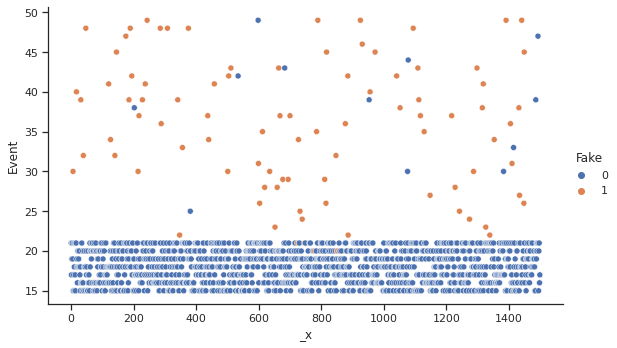

In [51]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

seaborn.relplot(data=sample_nb_events_per_user, 
                x=sample_nb_events_per_user.index, 
                y=EVENT, 
                hue=LABEL, 
                aspect=1.61)
plt.show()

#### Clearly seperable by a linear model